<a href="https://colab.research.google.com/github/didiruhyadi/SiliragungNet-Model/blob/main/SiliragungNet_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Github](https://github.com/tensorflow/examples/tree/master/lite/examples/object_detection/android)
[Readthedocs](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html)

In [1]:
# clone tensorflow model garden
import os
import pathlib

os.chdir('..')

# clone tensorflow model garden dari github
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2613, done.
remote: Counting objects: 100% (2613/2613), done.
remote: Compressing objects: 100% (2176/2176), done.
remote: Total 2613 (delta 648), reused 1229 (delta 405), pack-reused 0
Receiving objects: 100% (2613/2613), 32.59 MiB | 25.45 MiB/s, done.
Resolving deltas: 100% (648/648), done.


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

In [ ]:
# install tensorflow 2.2.0
!pip install tensorflow==2.2.0

In [4]:
# import dan print versi tensorflow
import tensorflow as tf
print("Tensorflow version: {}".format(tf.__version__))

Tensorflow version: 2.2.0


In [ ]:
#run model builder test
!python models/research/object_detection/builders/model_builder_tf2_test.py

In [6]:
# persiapan folder training
workspace = 'workspace'
training_demo = os.path.join(workspace, 'training_demo')
annotations = os.path.join(training_demo, 'annotations') # saving label_map.pbtxt
exported_models = os.path.join(training_demo, 'exported_models')
images = os.path.join(training_demo, 'images')
test = os.path.join(images, 'test')
train = os.path.join(images, 'train')
models = os.path.join(training_demo, 'models')
pre_trained_models = os.path.join(training_demo, 'pre_trained_models')

if not os.path.exists(workspace):
  os.makedirs(workspace)
  os.makedirs(training_demo)
  os.makedirs(annotations)
  os.makedirs(exported_models)
  os.makedirs(images)
  os.makedirs(test)
  os.makedirs(train)
  os.makedirs(models)
  os.makedirs(pre_trained_models)

# persiapan folder scripts
scripts = 'scripts'
if not os.path.exists(scripts):
  os.makedirs(scripts)
  os.makedirs(os.path.join(scripts, 'preprocessing'))


In [7]:
# Data Preparation
# from google.colab import drive
# drive.mount('/gdrive')

# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "didiruh" 
os.environ['KAGGLE_KEY'] = "fbaf0cae973329af03e018de237ea52f"

In [8]:
!kaggle datasets download -d andrewmvd/face-mask-detection

100% 397M/398M [00:09<00:00, 62.1MB/s]
100% 398M/398M [00:09<00:00, 45.9MB/s]


In [ ]:
!unzip /face-mask-detection.zip -d /workspace/training_demo/images

In [10]:
# move images file to direcotry 'images'
import shutil
import os
    
source_dir = '/workspace/training_demo/images/images'
target_dir = '/workspace/training_demo/images'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [11]:
# move annotaions file to directory 'images'
source_dir_ann = '/workspace/training_demo/images/annotations'
target_dir_ann = '/workspace/training_demo/images'
    
file_names = os.listdir(source_dir_ann)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir_ann, file_name), target_dir_ann)

# Partition Dataset

In [12]:
# clone label_map.pbtxt
%%bash
cd /workspace/training_demo/annotations
wget https://raw.githubusercontent.com/didiruhyadi/SiliragungNet-Model/main/annotations/label_map.pbtxt

--2021-05-09 04:08:17--  https://raw.githubusercontent.com/didiruhyadi/SiliragungNet-Model/main/annotations/label_map.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘label_map.pbtxt’

     0K                                                       100% 7.04M=0s

2021-05-09 04:08:17 (7.04 MB/s) - ‘label_map.pbtxt’ saved [137/137]



In [13]:
# get partition_dataset.py
%%bash
cd /scripts/preprocessing
wget https://raw.githubusercontent.com/didiruhyadi/SiliragungNet-Model/main/scripts/preprocessing/partition_dataset.py

--2021-05-09 04:08:17--  https://raw.githubusercontent.com/didiruhyadi/SiliragungNet-Model/main/scripts/preprocessing/partition_dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3577 (3.5K) [text/plain]
Saving to: ‘partition_dataset.py’

     0K ...                                                   100% 46.1M=0s

2021-05-09 04:08:18 (46.1 MB/s) - ‘partition_dataset.py’ saved [3577/3577]



In [14]:
!cp /scripts/preprocessing/partition_dataset.py .
!python3 /partition_dataset.py -x -i /workspace/training_demo/images -r 0.1

# Generate TFRECORD

In [15]:
# clone generate_tfrecord.py
%%bash
cd /scripts/preprocessing
wget https://raw.githubusercontent.com/didiruhyadi/SiliragungNet-Model/main/scripts/preprocessing/generate_tfrecord.py

--2021-05-09 04:08:19--  https://raw.githubusercontent.com/didiruhyadi/SiliragungNet-Model/main/scripts/preprocessing/generate_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6251 (6.1K) [text/plain]
Saving to: ‘generate_tfrecord.py’

     0K ......                                                100% 53.6M=0s

2021-05-09 04:08:19 (53.6 MB/s) - ‘generate_tfrecord.py’ saved [6251/6251]



In [16]:
!cp /scripts/preprocessing/generate_tfrecord.py .

# Create train data:
!python generate_tfrecord.py -x /workspace/training_demo/images/train -l /workspace/training_demo/annotations/label_map.pbtxt -o /workspace/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /workspace/training_demo/images/test -l /workspace/training_demo/annotations/label_map.pbtxt -o /workspace/training_demo/annotations/test.record

Successfully created the TFRecord file: /workspace/training_demo/annotations/train.record
Successfully created the TFRecord file: /workspace/training_demo/annotations/test.record


# Training Model

In [ ]:
# download pre-trained model
%%bash
cd /workspace/training_demo/pre_trained_models
wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

# unzip
tar xvzf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

In [18]:
# configure the training pipeline
# cell selanjutnya tidak usah di run
model_dir = '/workspace/training_demo/models'
mobilenet_dir = 'mobilenet_v2_fpnlite_640x640'
if not os.path.exists(mobilenet_dir):
  os.makedirs(mobilenet_dir)
  os.makedirs(os.path.join(model_dir, mobilenet_dir))

pipeline_dir = '/workspace/training_demo/pre_trained_models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config'

shutil.copy(pipeline_dir, mobilenet_dir)

'mobilenet_v2_fpnlite_640x640/pipeline.config'

In [25]:
# clone pipeline.config mobilenev2 dari github
%%bash
cd /workspace/training_demo/models/mobilenet_v2_fpnlite_640x640
wget https://raw.githubusercontent.com/didiruhyadi/SiliragungNet-Model/main/models/MobileNetV2/pipeline.config

--2021-05-09 04:19:08--  https://raw.githubusercontent.com/didiruhyadi/SiliragungNet-Model/main/models/MobileNetV2/pipeline.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4890 (4.8K) [text/plain]
Saving to: ‘pipeline.config’

     0K ....                                                  100% 46.1M=0s

2021-05-09 04:19:09 (46.1 MB/s) - ‘pipeline.config’ saved [4890/4890]



In [20]:
# copy model_main_tf2.py

model_main_dir = '/models/research/object_detection/model_main_tf2.py'
target_dir = '/workspace/training_demo'

shutil.copy(model_main_dir, target_dir)

'/workspace/training_demo/model_main_tf2.py'

In [21]:
# install tensorflow addons
!pip install tensorflow-addons==0.10.0

     |████████████████████████████████| 1.1MB 7.7MB/s 
ERROR: tf-models-official 2.4.0 has requirement tensorflow>=2.4.0, but you'll have tensorflow 2.2.0 which is incompatible.
  Found existing installation: tensorflow-addons 0.12.1
    Uninstalling tensorflow-addons-0.12.1:
      Successfully uninstalled tensorflow-addons-0.12.1


In [26]:
# training the model

%%bash
cd /workspace/training_demo
python model_main_tf2.py --model_dir=models/mobilenet_v2_fpnlite_640x640 --pipeline_config_path=models/mobilenet_v2_fpnlite_640x640/pipeline.config

Process is terminated.


In [27]:
%load_ext tensorboard
%tensorboard --logdir '/workspace/training_demo/models/mobilenet_v2_fpnlite_640x640/train'

<IPython.core.display.Javascript object>

In [29]:
# copy exporter_main_v2.py

shutil.copy('/models/research/object_detection/exporter_main_v2.py', '/workspace/training_demo')

'/workspace/training_demo/exporter_main_v2.py'

In [36]:
# install tensorflow 2.4

!python -m pip uninstall tensorflow-gpu==2.2
!python -m pip uninstall tensorflow==2.4.1

!python -m pip install tensorflow-gpu==2.4.1
!python -m pip install numpy==1.17.1

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 394.3MB 41kB/s 
     |████████████████████████████████| 471kB 41.7MB/s 
     |████████████████████████████████| 6.0MB 53.9MB/s 
     |████████████████████████████████| 4.9MB 22.4MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
     |██

In [37]:
# export model
%%bash
cd /workspace/training_demo
python exporter_main_v2.py --input_type image_tensor --pipeline_config_path models/mobilenet_v2_fpnlite_640x640/pipeline.config --trained_checkpoint_dir models/mobilenet_v2_fpnlite_640x640 --output_directory exported-models

2021-05-09 05:53:07.942134: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-09 05:53:10.102801: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-09 05:53:10.103734: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-09 05:53:10.133059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-09 05:53:10.133731: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-09 05:53:10.133773: I tensorflow/stream_executor/platform/default/dso_loade

In [38]:
# zip the model
!zip -r /workspace/training_demo/siliragungnet.zip /workspace/training_demo/exported-models

  adding: workspace/training_demo/exported-models/ (stored 0%)
  adding: workspace/training_demo/exported-models/pipeline.config (deflated 69%)
  adding: workspace/training_demo/exported-models/checkpoint/ (stored 0%)
  adding: workspace/training_demo/exported-models/checkpoint/checkpoint (deflated 42%)
  adding: workspace/training_demo/exported-models/checkpoint/ckpt-0.data-00000-of-00001 (deflated 8%)
  adding: workspace/training_demo/exported-models/checkpoint/ckpt-0.index (deflated 80%)
  adding: workspace/training_demo/exported-models/saved_model/ (stored 0%)
  adding: workspace/training_demo/exported-models/saved_model/saved_model.pb (deflated 93%)
  adding: workspace/training_demo/exported-models/saved_model/variables/ (stored 0%)
  adding: workspace/training_demo/exported-models/saved_model/variables/variables.index (deflated 78%)
  adding: workspace/training_demo/exported-models/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: workspace/training_demo

# Test Model

In [43]:
os.chdir('/content')

In [44]:
# clone tensorflow model garden
import os
import pathlib

# clone tensorflow model garden dari github
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2613, done.
remote: Counting objects: 100% (2613/2613), done.
remote: Compressing objects: 100% (2177/2177), done.
remote: Total 2613 (delta 648), reused 1226 (delta 404), pack-reused 0
Receiving objects: 100% (2613/2613), 32.59 MiB | 27.90 MiB/s, done.
Resolving deltas: 100% (648/648), done.


In [46]:
!pip install -U --pre tensorflow=="2.2.0"

  Using cached https://files.pythonhosted.org/packages/4c/1a/0d79814736cfecc825ab8094b39648cc9c46af7af1bae839928acb73b4dd/tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1d/74/0a6fcb206dcc72a6da9a62dd81784bfdbff5fedb099982861dc2219014fb/tensorboard-2.2.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/f5/926ae53d6a226ec0fda5208e0e581cffed895ccc89e36ba76a8e60895b78/tensorflow_estimator-2.2.0-py2.py3-none-any.whl
ERROR: tf-models-official 2.4.0 has requirement tensorflow>=2.4.0, but you'll have tensorflow 2.2.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.17.1 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 2.2.2 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.2.0 which is incompatible.

In [47]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [55]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [50]:
category_index = label_map_util.create_category_index_from_labelmap('/workspace/training_demo/annotations/label_map.pbtxt', use_display_name=True)

In [51]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/workspace/training_demo/exported-models/saved_model')

In [56]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [58]:
for image_path in glob.glob('/workspace/training_demo/images/*.png'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))
  if i == 10:
    break

ValueError: ignored

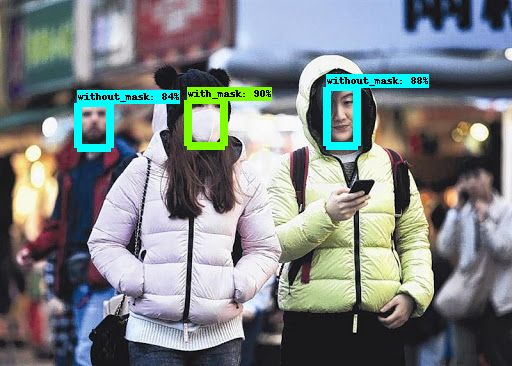

In [59]:
image_path = '/workspace/training_demo/images/train/maksssksksss0.png'

image_np = load_image_into_numpy_array(image_path)
output_dict = run_inference_for_single_image(model, image_np)
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)
display(Image.fromarray(image_np))

# Convert to TFLite Model

In [3]:
!pip install tf-nightly

     |████████████████████████████████| 453.2MB 35kB/s 
     |████████████████████████████████| 1.3MB 49.2MB/s 
     |████████████████████████████████| 471kB 49.9MB/s 
     |████████████████████████████████| 5.9MB 42.8MB/s 
     |████████████████████████████████| 4.0MB 45.1MB/s 
     |████████████████████████████████| 4.2MB 43.2MB/s 
ERROR: tensorflow 2.4.0 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement grpcio~=1.32.0, but you'll have grpcio 1.37.1 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement grpcio~=1.32.0, but you'll have grpcio 1.37.1 which is incompatible.
ERROR: tensorflow-gpu 2.4.1 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
ERROR: apache-beam 2

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0-dev20210508


In [3]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/workspace/training_demo/exported-models/saved_model')
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)



17304796